In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd drive/My Drive/keras-u-net-master

/content/drive/My Drive/keras-u-net-master


In [4]:
from __future__ import print_function

import os
import numpy as np

from skimage.io import imsave, imread
from PIL import Image
data_path = 'data/'

image_rows = 512
image_cols = 512


def create_train_data():
    train_data_path = os.path.join(data_path, 'train/Image PP/')
    train_data_Label_path = os.path.join(data_path, 'train/Label/')
    images = os.listdir(train_data_path)
    total = len(images)

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_mask = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)

    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    for image_name in images:
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)
        img_mask = imread(os.path.join(train_data_Label_path, image_name), as_gray=True)

        img = np.array([img])
        img_mask = np.array([img_mask])

        imgs[i] = img
        imgs_mask[i] = img_mask

        if i % 50 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    imgs_mask_train = np.load('imgs_mask_train.npy')
    return imgs_train, imgs_mask_train


def create_test_data():
    train_data_path = os.path.join(data_path, 'test/Image PP')
    images = os.listdir(train_data_path)
    total = len(images)

    imgs = np.ndarray((total, image_rows, image_cols), dtype=np.uint8)
    imgs_id = np.ndarray((total, ), dtype=np.int32)

    i = 0
    print('-'*30)
    print('Creating test images...')
    print('-'*30)
    for image_name in images:
        img_id = int(image_name.split('.')[0])
        img = imread(os.path.join(train_data_path, image_name), as_gray=True)

        img = np.array([img])

        imgs[i] = img
        imgs_id[i] = img_id

        if i % 10 == 0:
            print('Done: {0}/{1} images'.format(i, total))
        i += 1
    print('Loading done.')

    np.save('imgs_test.npy', imgs)
    np.save('imgs_id_test.npy', imgs_id)
    print('Saving to .npy files done.')

def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    imgs_id = np.load('imgs_id_test.npy')
    return imgs_test, imgs_id

if __name__ == '__main__':
    create_train_data()
    create_test_data()

------------------------------
Creating training images...
------------------------------
Done: 0/150 images
Done: 50/150 images
Done: 100/150 images
Loading done.
Saving to .npy files done.
------------------------------
Creating test images...
------------------------------
Done: 0/60 images
Done: 10/60 images
Done: 20/60 images
Done: 30/60 images
Done: 40/60 images
Done: 50/60 images
Loading done.
Saving to .npy files done.


Loading and preprocessing train data...
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 256, 256, 64)      640       
_________________________________________________________________
batch_normalization_27 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_28 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
batch_normaliz

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:157: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 120 samples, validate on 30 samples
Epoch 1/1000
120/120 [==============================] - 14s 117ms/step - loss: 0.7685 - dice_coef: 0.1178 - accuracy: 0.5263 - mean_io_u_1: 0.4763 - mean_absolute_error: 0.4886 - val_loss: 372.9404 - val_dice_coef: 0.1348 - val_accuracy: 0.0601 - val_mean_io_u_1: 0.4283 - val_mean_absolute_error: 0.9185
Epoch 2/1000
120/120 [==============================] - 5s 46ms/step - loss: 0.6426 - dice_coef: 0.1316 - accuracy: 0.6779 - mean_io_u_1: 0.4349 - mean_absolute_error: 0.4631 - val_loss: 11098.4095 - val_dice_coef: 0.1341 - val_accuracy: 0.0551 - val_mean_io_u_1: 0.4176 - val_mean_absolute_error: 0.9242
Epoch 3/1000
120/120 [==============================] - 5s 46ms/step - loss: 0.5936 - dice_coef: 0.1566 - accuracy: 0.8034 - mean_io_u_1: 0.4244 - mean_absolute_error: 0.4288 - val_loss: 14267.0920 - val_dice_coef: 0.1341 - val_accuracy: 0.0554 - val_mean_io_u_1: 0.4141 - val_mean_absolute_error: 0.9238
Epoch 4/1000
120/120 [==================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/13_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/16_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/2_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/22_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/3_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/5_pred.png is a low contrast image
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:181: UserWarning: preds_SegNet/9_pred.png is a low contrast image


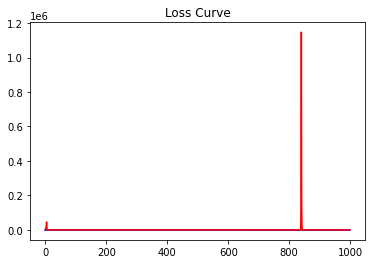

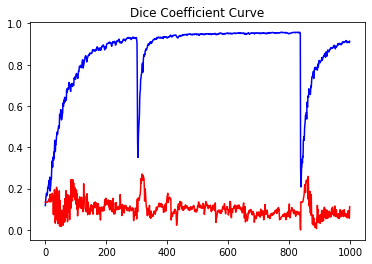

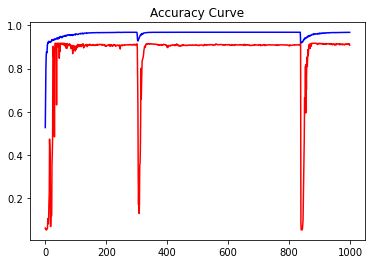

In [6]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from keras.models import Sequential,Model  
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization,Reshape,Permute,Activation
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras import losses,metrics
import tensorflow as tf

from data_preparation import load_train_data, load_test_data

K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = 256
img_cols = 256
n_label=2
smooth = 1.


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return dice_coef(y_true, y_pred)

def SegNet(pretrained_weights=None):
    model = Sequential()  
    #encoder  
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(img_rows,img_cols,1),padding='same',activation='relu',data_format='channels_last'))
    model.add(BatchNormalization())  
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2,2)))  
    #(128,128)  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2,2)))
    #(64,64)  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(32,32)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(16,16)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    #(8,8)  
    #decoder  
    model.add(UpSampling2D(size=(2,2)))  
    #(16,16)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(32,32)  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(512, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(64,64)  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(128,128)  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(UpSampling2D(size=(2, 2)))  
    #(256,256)  
    model.add(Conv2D(64, (3, 3), strides=(1, 1), input_shape=(img_rows, img_cols,3), padding='same', activation='relu',data_format='channels_last'))
    model.add(BatchNormalization())  
    model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))  
    model.add(BatchNormalization())  
    model.add(Conv2D(1, (1, 1), strides=(1, 1), padding='same'))  
    #model.add(Reshape((img_rows,img_cols,n_label)))
    #model.add(Permute((2,1)))  
    model.add(Activation('sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=[dice_coef,'accuracy',tf.keras.metrics.MeanIoU(num_classes=2),metrics.mae])  
    model.summary()  
    
    #model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=[dice_coef,'acc', tf.keras.metrics.MeanIoU(num_classes=2),metrics.mae])
    if (pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p


def train_and_predict():
    print('Loading and preprocessing train data...')
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std

    imgs_mask_train = imgs_mask_train.astype('float32')
    imgs_mask_train /= 255.  # scale masks to [0, 1]

    #model = SegNet('unet_weights_150_Img_SegNet.h5') #If you are training again, use this line to load the pre-training model
    model = SegNet()

    model_checkpoint = ModelCheckpoint('unet_weights_150_Img_SegNet.h5', monitor='val_loss', save_best_only=True)
    print('Fitting model...')
    hist=model.fit(imgs_train, imgs_mask_train, batch_size=16, nb_epoch=1000, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])
    print(model.summary())

    imgs_test, imgs_id_test = load_test_data()
    imgs_test = preprocess(imgs_test)
    imgs_test = imgs_test.astype('float32')
    mean=np.mean(imgs_test)
    std=np.std(imgs_test)
    imgs_test -= mean
    imgs_test /= std

    model.load_weights('unet_weights_150_Img_SegNet.h5')

    print('Predicting masks on test data...')

    imgs_mask_test = model.predict(imgs_test, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)
    pred_dir = 'preds_SegNet'

    if not os.path.exists(pred_dir):
      os.mkdir(pred_dir)

    for image, image_id in zip(imgs_mask_test, imgs_id_test):
      image = (image[:, :, 0] * 255.).astype(np.uint8)
      imsave(os.path.join(pred_dir, str(image_id) + '_pred.png'), image)
    
    import matplotlib.pyplot as plt
    import pickle
    model.load_weights('unet_weights_150_Img_SegNet.h5')
    l_s=plt.plot(hist.history['loss'], color='b')
    vl_s=plt.plot(hist.history['val_loss'], color='r')
    plt.title('Loss Curve')
    pickle.dump(l_s, open('Loss_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(vl_s, open('Val_Loss_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.show()

    d_s=plt.plot(hist.history['dice_coef'], color='b')
    vd_s=plt.plot(hist.history['val_dice_coef'], color='r')
    plt.title('Dice Coefficient Curve')
    pickle.dump(d_s, open('Dice_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(vd_s, open('Val_Dice_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.show()

    a_s=plt.plot(hist.history['accuracy'], color='b')
    va_s=plt.plot(hist.history['val_accuracy'], color='r')
    plt.title('Accuracy Curve')
    pickle.dump(a_s, open('Acc_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    pickle.dump(va_s, open('Val_Acc_Seg.fig.pickle', 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`
    plt.show()

if __name__ == '__main__':
    train_and_predict()

In [0]:
!pip install keras-metrics